### Fit Bit

#### Import the requirements

In [135]:
import pandas as pd
import numpy as np

#### Data Loading

In [136]:
fit=pd.read_csv('FitBit data.csv')
fit.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [137]:
fit.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
452,8877689391,4/8/2016,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
453,8877689391,4/9/2016,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
454,8877689391,4/10/2016,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
455,8877689391,4/11/2016,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820
456,8877689391,4/12/2016,2350,1.780000,1.780000,0.0,0.00,0.00,1.78,0.00,0,0,58,531,938


In [138]:
fit.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [139]:
#shape of the dataset
print('Number of record:{}'.format(fit.shape[0]))
print('Number of Obserations: {}'.format(fit.shape[1]))

Number of record:457
Number of Obserations: 15


In [140]:
fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [141]:
#Check any null value,unique_values are present in the data
miss_data=pd.DataFrame({"Missing_values":fit.isnull().sum(),'Percentage_of_Nan':(fit.isnull().sum()/fit.shape[0])*100,'unique_values':fit.nunique()})
miss_data

,Missing_values,Percentage_of_Nan,unique_values
Id,0,0.0,35
ActivityDate,0,0.0,32
TotalSteps,0,0.0,389
TotalDistance,0,0.0,334
TrackerDistance,0,0.0,336
LoggedActivitiesDistance,0,0.0,20
VeryActiveDistance,0,0.0,170
ModeratelyActiveDistance,0,0.0,140
LightActiveDistance,0,0.0,295
SedentaryActiveDistance,0,0.0,8


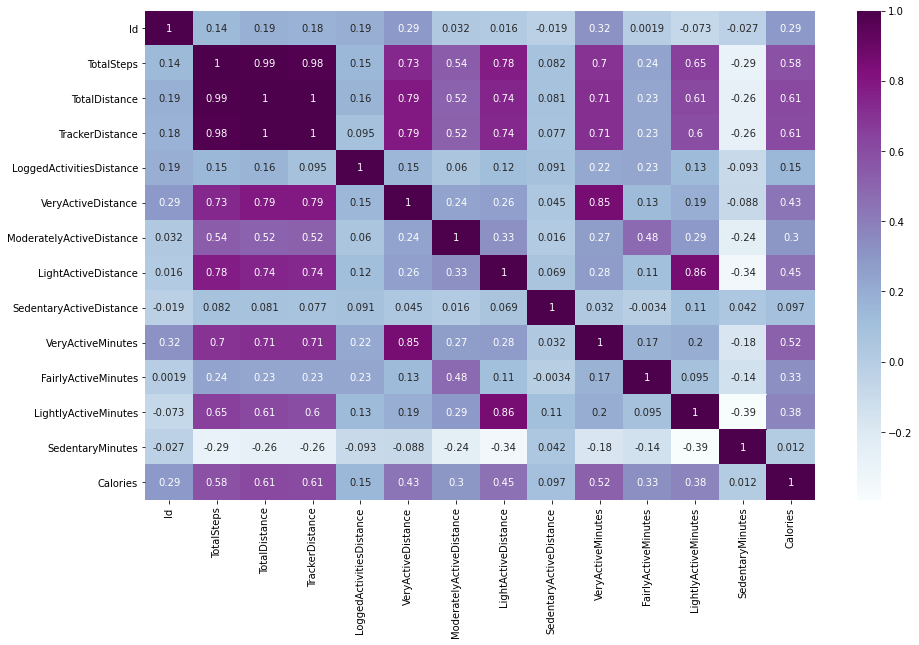

In [142]:
#Check the correlation with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,9))
sns.heatmap(fit.corr(),annot=True,cmap='BuPu')
plt.show()

In [143]:
#Copy the fit data in to df
df=fit.copy()

In [144]:
#Extract the date , month , year from the ActivityDate column
df['Date']=pd.to_datetime(df['ActivityDate']).dt.day
df['Month']=pd.to_datetime(df['ActivityDate']).dt.month
df['Year']=pd.to_datetime(df['ActivityDate']).dt.year

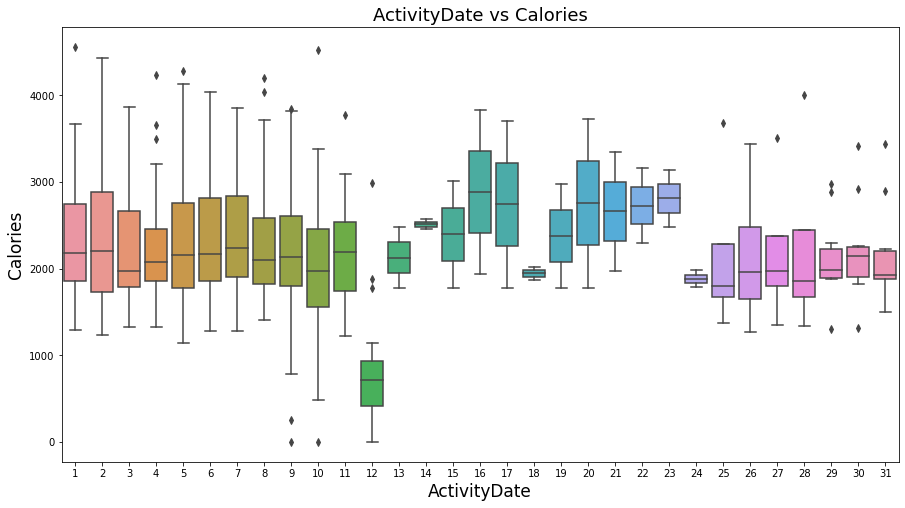

In [145]:
plt.rcParams['figure.figsize']=(15,8)
ax=sns.boxplot(x='Date',y='Calories',data=df)
ax.set_title('ActivityDate vs Calories',fontsize=18)
ax.set_xlabel('ActivityDate',fontsize=17)
ax.set_ylabel('Calories',fontsize=17)
plt.show()

In [146]:
#Check the data type of the Activity column
print(df['ActivityDate'].dtypes)

object


In [152]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

In [154]:
fit.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [183]:
#Check the distribution of the each attribute

def plot_data(data,variable):
    plt.figure(figsize=(10,6))
    plt.style.use('classic')
    ax= sns.distplot(data[variable],bins=50,color='b')
    ax.set_title(variable,c='b',fontsize=18)
    ax.set_xlabel(variable,c='g',fontsize=18)
    ax.set_ylabel('Count')
    plt.show()

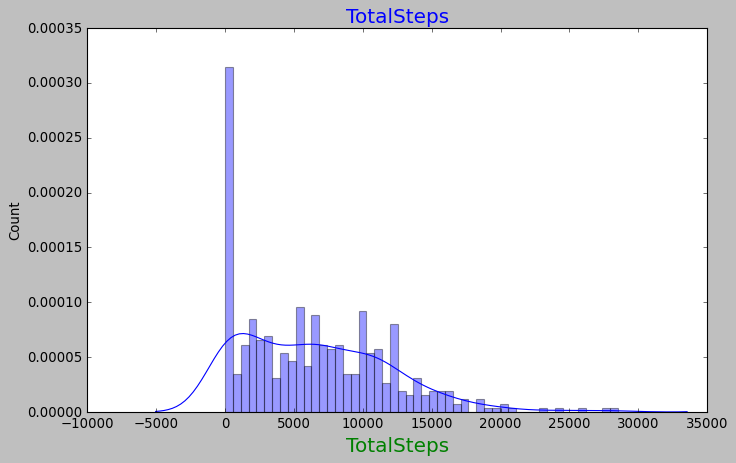

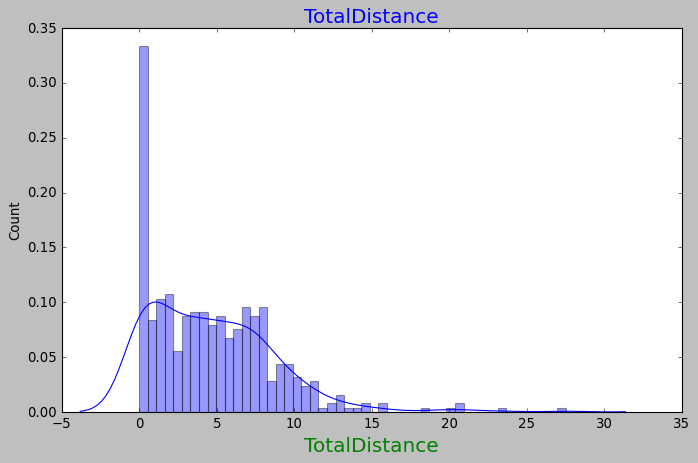

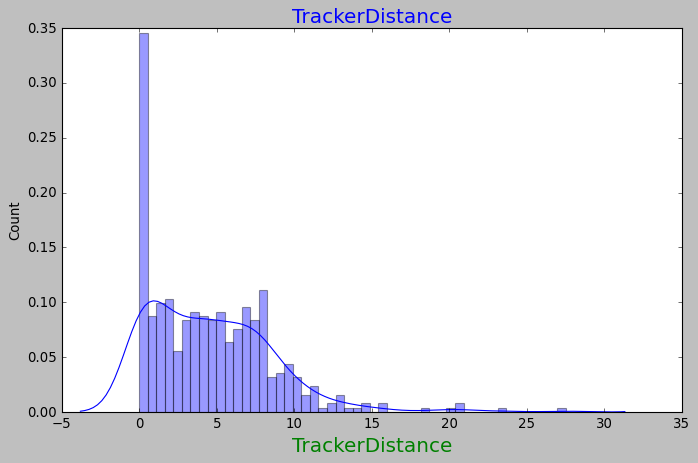

C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


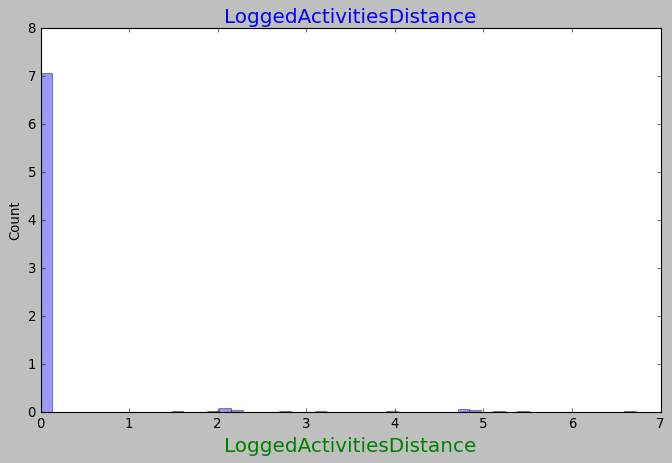

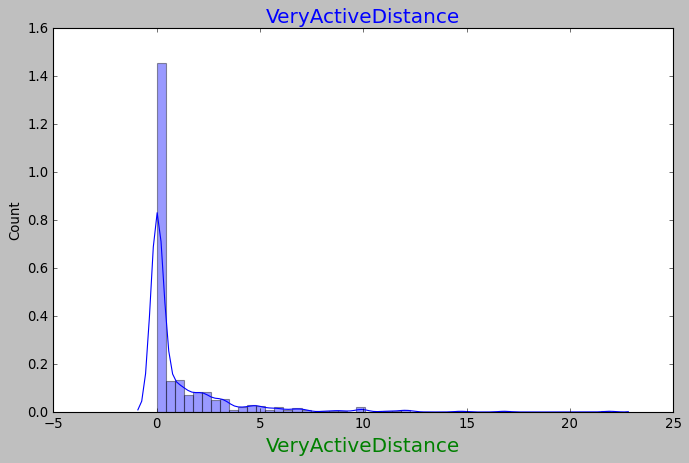

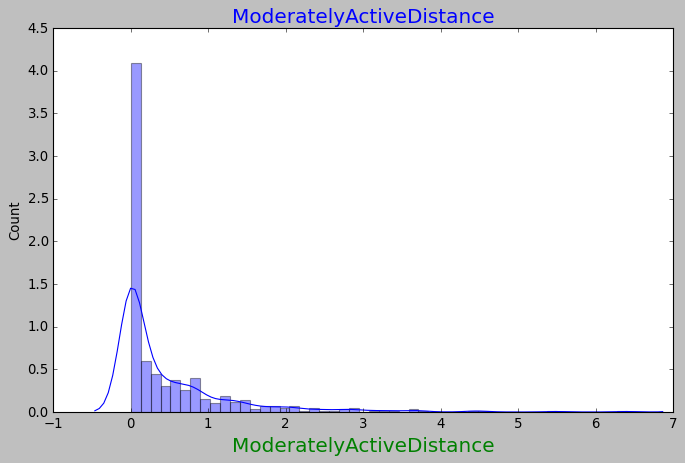

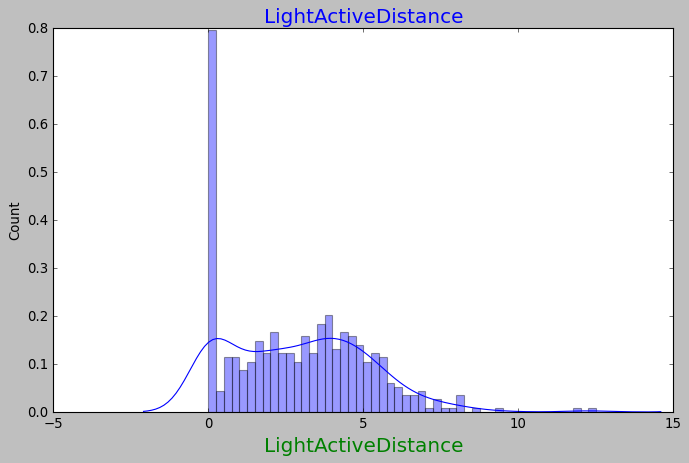

C:\Users\Praneeth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


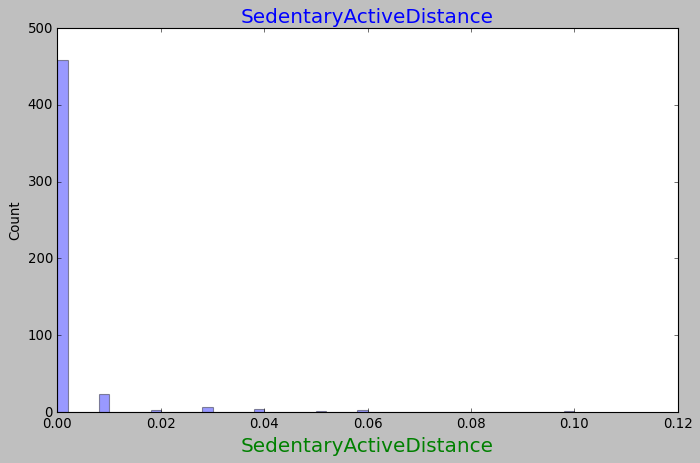

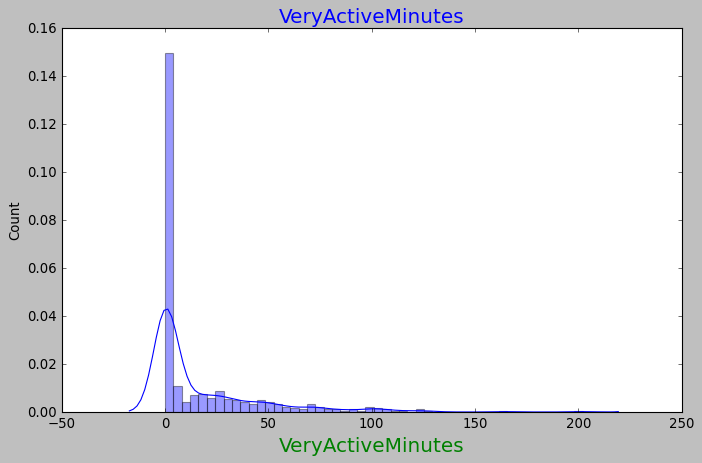

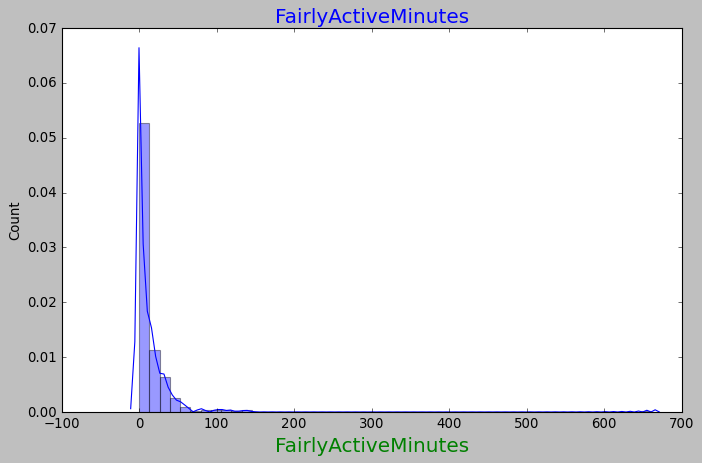

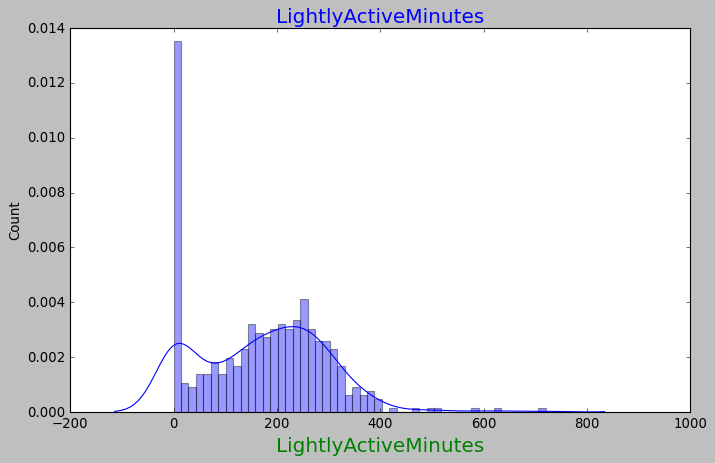

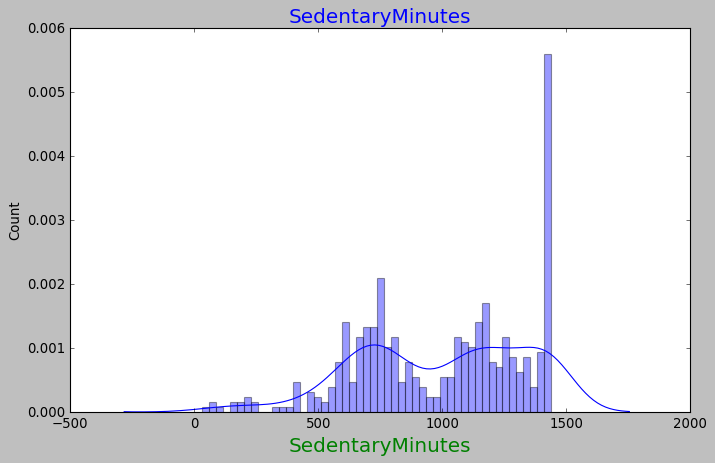

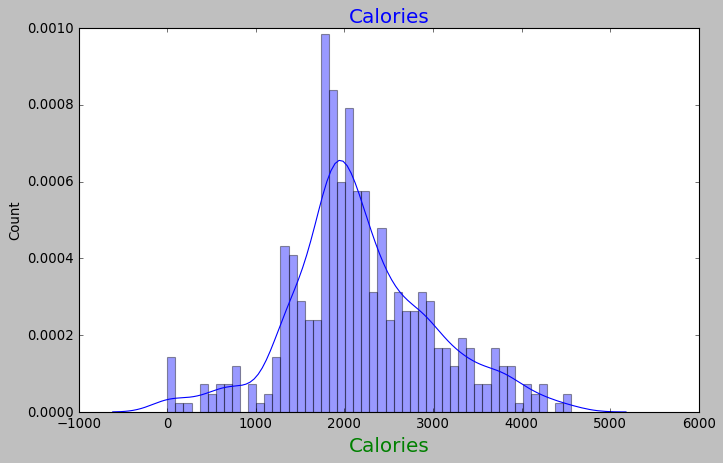

In [184]:
for i in fit.iloc[:,2:].columns:
    plot_data(fit,i)

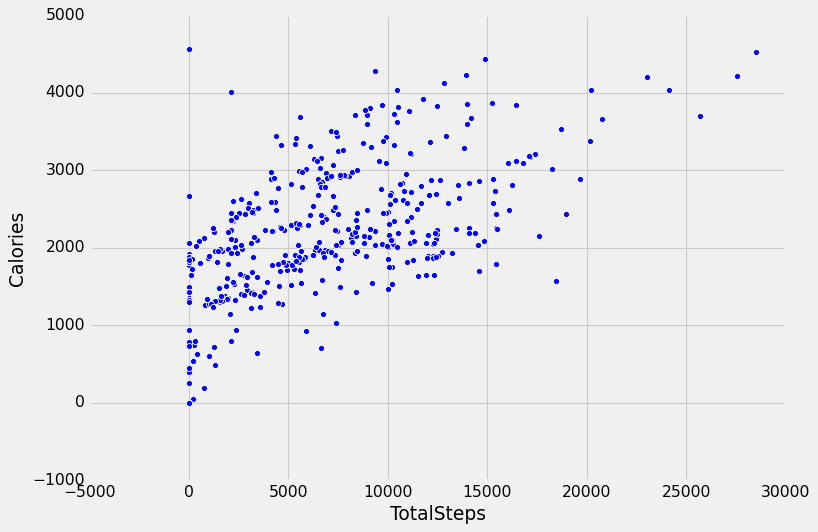

In [213]:
#Check the relation between the variables by the scatterplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.scatterplot(x='TotalSteps',y='Calories',data=fit,s=30)
plt.axis()
plt.show()

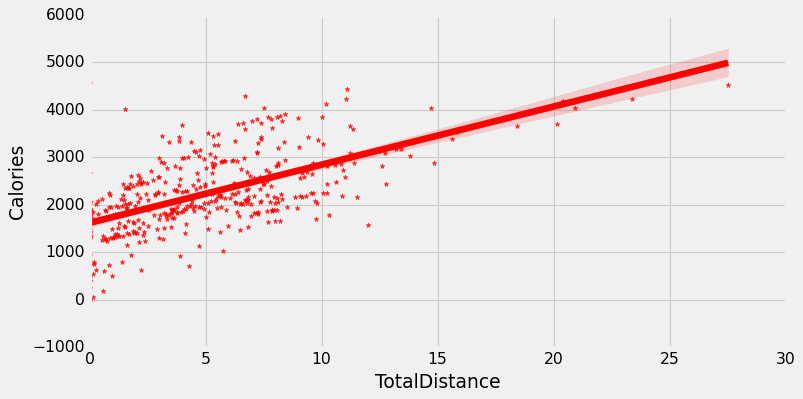

In [209]:
plt.figure(figsize=(10,5))
sns.regplot(x='TotalDistance',y='Calories',data=fit,scatter=True,marker='*',color='red')
plt.show()

<Figure size 800x480 with 0 Axes>

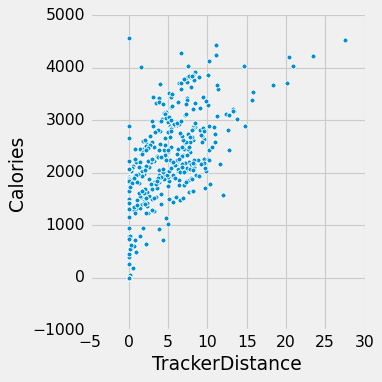

In [210]:
plt.figure(figsize=(10,6))
sns.relplot(x='TrackerDistance',y='Calories',data=fit,markers='^')
plt.show()

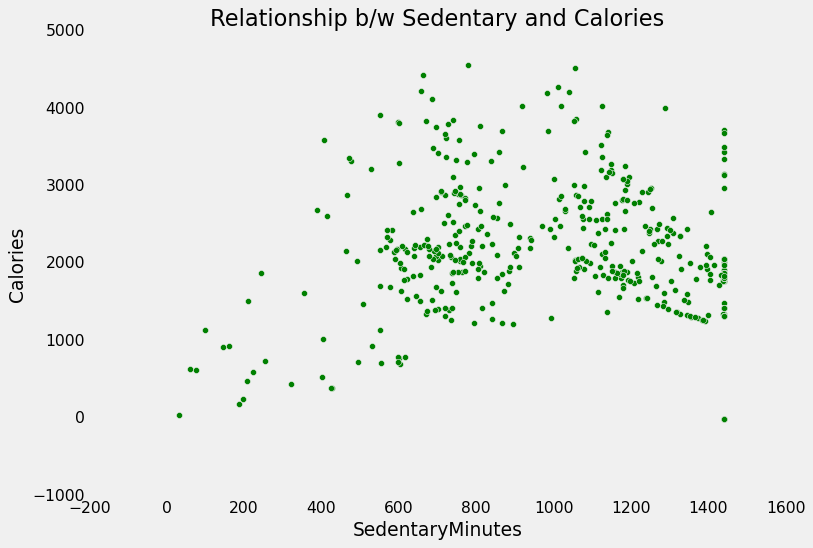

In [211]:
plt.scatter(fit['SedentaryMinutes'],fit['Calories'],s=30,marker='o',c='g')
plt.xlabel('SedentaryMinutes')
plt.ylabel('Calories')
plt.title('Relationship b/w Sedentary and Calories')
plt.grid()
plt.show()

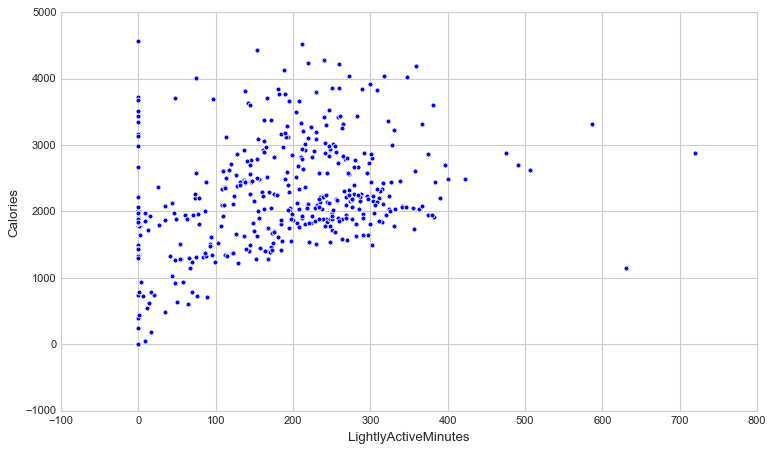

In [244]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LightlyActiveMinutes',y='Calories',data=fit)
plt.show()

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

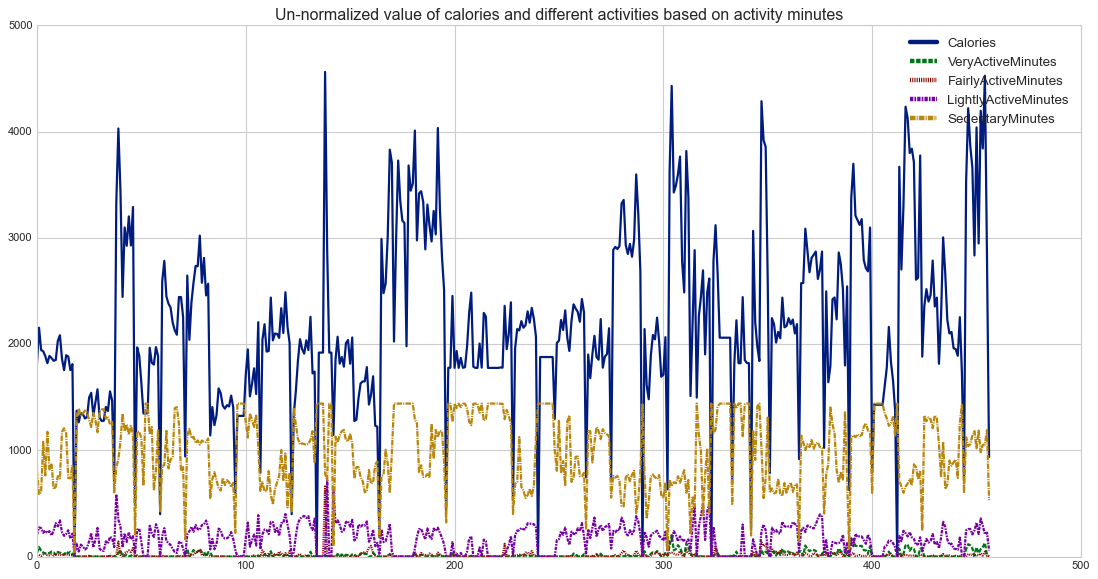

In [242]:
col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = df[col_select]
plt.style.use('seaborn-dark-palette')
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df,linewidth=2)

ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

In [245]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date,Month,Year
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,25,3,2016
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,26,3,2016
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,27,3,2016
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,28,3,2016
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,29,3,2016


<Figure size 800x480 with 0 Axes>

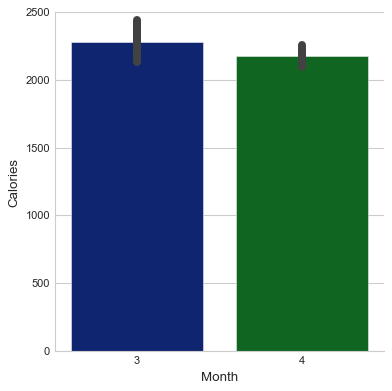

In [249]:
plt.figure(figsize=(10,6))
sns.catplot(x='Month',y='Calories',data=df,kind='bar')
plt.show()